In [1]:
import numpy as np
import pandas as pd

In [2]:
crop=pd.read_csv(r"C:\Users\Srija\Downloads\minor\Crop_recommendation.csv" )

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop = crop.rename(columns={
    'N': 'Nitrogen',
    'P': 'Phosphorus',
    'K': 'Potassium'
})
crop.tail()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
x=crop.drop('label',axis=1)
y=crop['label']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Srija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred1=model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
logistic_reg_acc=accuracy_score(y_test,y_pred1)
print("logistic accuracy is "+str(logistic_reg_acc))

logistic accuracy is 0.9704545454545455


In [14]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred3=model2.predict(x_test)

In [15]:
decision_acc=accuracy_score(y_test,y_pred3)
print("Decision tree accuracy is "+str(decision_acc))

Decision tree accuracy is 0.9954545454545455


In [16]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred4=model3.predict(x_test)

In [17]:
random_acc=accuracy_score(y_test,y_pred4)
print("Random forest accuracy is "+str(random_acc))

Random forest accuracy is 0.9977272727272727


In [18]:
# New input
Nitrogen = 40
Phosphorus = 50
Potassium = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

# Predict on new input
new_input = [[Nitrogen, Phosphorus, Potassium, temperature, humidity, ph, rainfall]]
predict = model2.predict(new_input)
predicted_class = predict[0]

print(f"{predicted_class} is the best crop to be cultivated.")


kidneybeans is the best crop to be cultivated.


C:\Users\Srija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [19]:
Nitrogen = 90
Phosphorus = 40
Potassium = 40
temperature = 27.0
humidity = 85
ph = 6.5
rainfall = 220
new_input = [[Nitrogen, Phosphorus, Potassium, temperature, humidity, ph, rainfall]]
predict = model2.predict(new_input)
predicted_class = predict[0]

print(f"{predicted_class} is the best crop to be cultivated.")

C:\Users\Srija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


rice is the best crop to be cultivated.


In [20]:
Nitrogen = 40
Phosphorus = 30
Potassium = 60
temperature = 20.0
humidity = 60
ph = 6.8
rainfall = 130

new_input = [[Nitrogen, Phosphorus, Potassium, temperature, humidity, ph, rainfall]]
predict = model2.predict(new_input)
predicted_class = predict[0]

print(f"{predicted_class} is the best crop to be cultivated.")

mango is the best crop to be cultivated.


C:\Users\Srija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
import joblib
import sklearn

In [25]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)
print("numpy",np.__version__)
print("joblib",joblib.__version__)

numpy 1.23.4
pandas 1.5.1
sklearn 1.2.2
numpy 1.23.4
joblib 1.2.0


In [22]:
filename='crop_app.pkl'

In [30]:
joblib.dump(model3,'crop_app.pkl')

['crop_app.pkl']

In [31]:
app=joblib.load('crop_app.pkl')

In [32]:
arr=[[118,33,30,24.131797,67.225123,6.362608,173.322839]]
y_p=app.predict(arr)

C:\Users\Srija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
y_p

array(['coffee'], dtype=object)

In [35]:
arr=[[40,30,60,20.0,60,6.8,130]]
y_p=app.predict(arr)
y_p

C:\Users\Srija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['pomegranate'], dtype=object)

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, x, y, cv=5)
print("Cross-validated scores:", scores)
print("Average CV score:", scores.mean())

Cross-validated scores: [0.99545455 0.99318182 0.99545455 0.99545455 0.99090909]
Average CV score: 0.9940909090909091


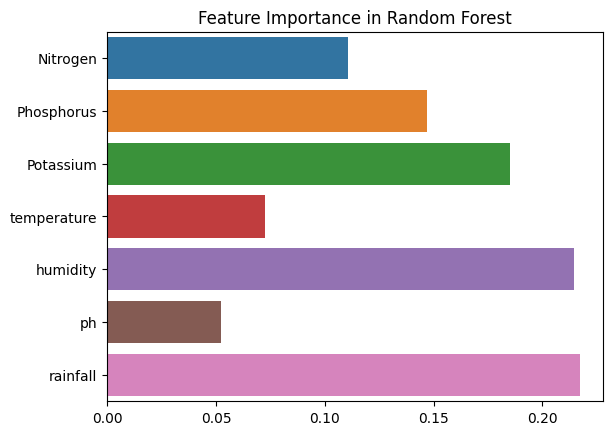

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
feat_importances = pd.Series(model3.feature_importances_, index=x.columns)
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance in Random Forest")
plt.show()

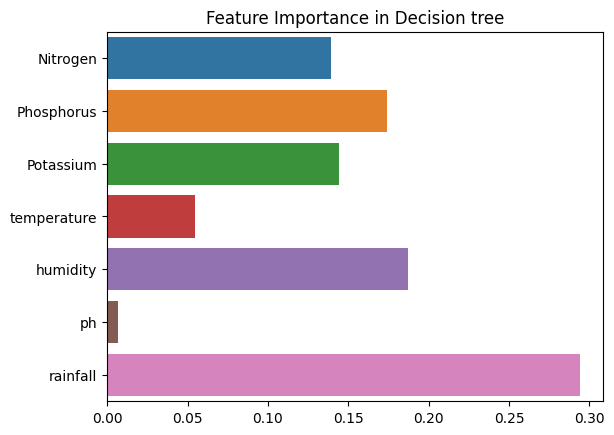

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
feat_importances = pd.Series(model2.feature_importances_, index=x.columns)
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance in Decision tree")
plt.show()